In [1]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta


from scipy.stats import mstats
import japanize_matplotlib



In [2]:

def folding_price_data(df, index2):
       


    DATA = pd.DataFrame({})


    for i in range(0,len(df), index2):

        try:
            temp = df.iloc[i:index2+i,:]
        except:
            temp = df.iloc[i:,:]
        M, m = max(temp["High"]), min(temp["Low"])
        open_p, close_p = temp['Open'].values[0], temp['Close'].values[-1]
        tp = pd.DataFrame({'Open':[open_p], 'High':[M], 'Low':[m], 'Close':[close_p]}, index=[temp.index.to_list()[0]])
        DATA = pd.concat([DATA, tp], axis=0)
        

    #DATA.index = df.query('@df.index.month % @index2== 0').index

    return DATA 


        

In [3]:
# 月時価格データおよび予測
num=1
predict = pd.read_csv("./prediction/" + 'USBond' + f"3moTest{num}.csv", index_col=0, parse_dates=True)
predict

,predict
2007-06-01,1.0
2007-09-01,1.0
2007-12-01,1.0
2008-03-01,1.0
2008-06-01,1.0
...,...
2022-09-01,1.0
2022-12-01,1.0
2023-03-01,1.0
2023-06-01,1.0


In [3]:
ticker = 'IYR'
price = yf.download(ticker, start='2011-09-01', end='2023-06-30', interval='1mo')

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-01,57.060001,57.380001,50.430000,50.570000,33.194221,231594400
2011-10-01,50.180000,58.180000,46.700001,57.240002,37.977814,243037900
2011-11-01,55.720001,57.529999,51.230000,55.139999,36.584499,172846900
2011-12-01,54.990002,57.660000,53.509998,56.810001,37.692520,116678700
2012-01-01,57.740002,61.020000,56.060001,60.560001,40.601292,116124600
...,...,...,...,...,...,...
2023-02-01,92.230003,96.019997,86.570000,87.070000,85.201271,115085700
2023-03-01,86.419998,88.779999,78.110001,84.900002,83.077843,217973200
2023-04-01,84.800003,86.050003,82.500000,85.680000,84.318527,140376800


In [4]:

data2 = yf.download(ticker, start='2011-01-01', end='2023-06-30', interval='1d')
switch = 0
pd.set_option('display.max_rows', 10)


def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)


def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return dt.date(year, month, day) if day else None

# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        
count = 0
data3 = data2
for i, j in data3.iterrows():
    

    if i.month % 3 != 0:
        data3.loc[i, 'Trade'] =  0
        continue

    
    if switch == 1:
        switch += 1
        data3.loc[i, 'Trade'] =  2
        continue
    
    row, week_num = get_nth_dow_datetime(*[i.year, i.month, i.day])

    
    
    
    if (switch == 0) & (i.day>= 20):
        data3.loc[i, 'Trade'] =  1
        count = 0
        switch += 1

    elif i.day in range(1, 20):
        data3.loc[i, 'Trade'] =  0
        
        switch = 0
    
    else:
    
        data3.loc[i, 'Trade'] =  0
        pass
    
    
        
    
data2 = data3.fillna({"Trade": float(0)})
data2['year'], data2['month'] = data2.index.year, data2.index.month
data2.head(100)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Trade,year,month
Date,,,,,,,,,
2011-01-03,56.290001,56.930000,56.250000,56.830002,36.647137,8221200,0.0,2011,1
2011-01-04,57.000000,57.080002,55.560001,55.820000,35.995827,11275100,0.0,2011,1
2011-01-05,55.639999,56.169998,55.599998,56.049999,36.144135,9167100,0.0,2011,1
2011-01-06,56.139999,56.230000,55.619999,55.750000,35.950691,6797500,0.0,2011,1
2011-01-07,55.900002,56.099998,55.230000,55.730000,35.937798,10495700,0.0,2011,1
...,...,...,...,...,...,...,...,...,...
2011-05-19,61.619999,61.980000,61.250000,61.660000,40.108250,5112300,0.0,2011,5
2011-05-20,61.450001,61.660000,60.980000,61.029999,39.698437,5737100,0.0,2011,5
2011-05-23,60.389999,60.689999,60.290001,60.389999,39.282131,10880900,0.0,2011,5


In [5]:
fold_index = 3

price_and_predict = pd.concat([folding_price_data(price.loc["2010-03-01":"2023-06-01"], fold_index), predict.loc[:"2023-06-01",:]],axis=1)
price_and_predict

NameError: name 'predict' is not defined

In [84]:
# graphization
def graph(df, save, file_name, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp = df["interest"].values

        initial = df["Asset"][0] 
        lis = np.cumsum(temp) + initial

        profit_month =np.array(lis)  / initial
        
        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp = df["Return"].values

        
        
        profit_month = np.array(temp)

        # 単利運用での資産額の計算
        total = 1 + np.cumsum(profit_month)

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values

        # ドローダウンの計算
        dd = max_assets - total
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()
    
    ax1.set_ylabel('資産額')
    ax1.plot(total, label='Total')
    ax1.plot(max_assets, label='max Total')
    ax1.legend()

    ax2.set_ylabel('Drawdown(％)')
    ax2.bar(np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
    ax2.legend(loc='upper right')
    if save:
        fig.savefig(file_name+".png")

In [7]:


# 計算用

# ロスカットした際に所持金額が足りないとき
def Asset_initiated(initiate_asset, open_price, rate, next_month_open_price,totalreturn, ind):    

    # Losscut : open_price * (1-losscut_rate) > next_month_open_price
    string = str(ind) + " "
    
    if open_price * (1+ rate) > next_month_open_price:
        pass
    elif open_price * (1+ rate)+totalreturn > next_month_open_price:
        # if you trade off at all,sale price at the time + totalreturn > next month open price,then you can trade it freely.   
        pass
    else:
        # initiate asset is replaced.
        initiate_asset = next_month_open_price
        
        # string : ProfitLine -> "profit line is crossed."" Losscut -> "Losscut.""
        print(string + " And initiate asset is replaced.")
    
    return initiate_asset


# plはprofit and loss です.

def order_pl(data, losscut, profitline, losscut2, profitline2, predict):
    open_price = data.query('Trade==2')['Open'].values[0]
    open_price = float(open_price)
    skip_num = np.where(data['Trade'].values==2)[0][0]
    
    switch = 0
    # ↓not used
    return_value = 0
    data = data.iloc[skip_num:, :]
    try:
        exit_idxs = np.where(data['Trade'].values==1)[1]
    except:
        exit_idxs = np.where(data['Trade'].values==1)[0]
        
    if len(exit_idxs) > 0:
        # データに手仕舞い日以降のデータが含まれていたら削除
        data = data.iloc[:exit_idxs[-1]+1]
    string = "None"
    for i, temp in data.iterrows():

        high_to_open = temp["High"] - open_price
        open_to_low = open_price - temp["Low"]
        if predict == 0: 
            
            # sell order 

            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low
            
            losscut_rate = losscut2
            profit_rate = profitline2
            
            director = -1    
        else:           
            
            # buy order
            
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            director = 1
            
            losscut_rate = losscut
            profit_rate = profitline
            pass
        
        
        
        profit_secure = perspective_maxprofit >= open_price * profit_rate
        loss_cut = perspective_maxloss >= open_price * losscut_rate
        if (not profit_secure) and (not loss_cut):
            # 利確・損切に到達していないとき
            continue
        elif profit_secure and loss_cut:
            
            # まさかないとは思うが、、、日中でロスカットと利確ラインに到達したとき
            assert False, "TODO: 日中でロスカットと利確ラインに到達した場合の処理を書く"
        elif profit_secure:
            profit = open_price * profit_rate
            message = 'crossed'
            print("check : Profit Line is crossed.")
            return profit, message, open_price
        else: # loss_cut
            profit = -open_price * losscut_rate
            message = 'losscut.'
            print("check : Losscut.")
            return profit, message, open_price

    try:
        data.query('Trade==1')['Close'].values[-1]
    except:
        close_price = data['Close'].tail(1).values
        return_value =  close_price - open_price
        return_value *= director
    else:
        return_value = data.query('Trade==1')['Close'].values[-1] - open_price
        return_value *= director


    

    
    return (return_value, string, open_price)


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = "crossed", "safe"
    elif message == 'losscut.':
        profitline, loss_cut = "not crossed", "Losscut."
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)
    
def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)

# This code(function) yields to totalreturn_per_year_list and dataframe of whole trades.
# If variable option is not incerted,  option is void, or empty.(空白)
# data2 is price data per day.

def calc(data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2):
    
    profit_count = 0 
    losscut_count = 0
    
    
    predicts = data["predict"].values
    # "reverse" were the opposite, then What score...?
    if reverse:
        predicts = [int(not num) for num in predicts] 
        print("(入力前の)シグナルが0なら買います。")
    else:
        # reverse_ind = 1
        print("(入力前の)シグナルが0なら売ります。")
    
    
    profitline= "not crossed"
    
    box = []
    totalreturn = 0
    Asset = 0
    
    loss_cut_sgn = "safe"
    profit_count = 0
    losscut_count = 0
    dic = {}
    df = pd.DataFrame()
    initiate_asset = data["Open"][0]
    
    
    for i,ind in enumerate(data.index) :       
        predict = predicts[i]
        
        year = int(ind.year)
        month = int(ind.month)
        
        # Example startが2011.7.12のとき、2011.7.1 ～ 2011.8.28までのデータを入手
        init = date(year, month, 1)
        
        # data2は日時データで一部をqueryで抜粋する。
        # ex.start : 2011.7のとき、intervalが1か月ならば、7月13日あたり(休日等考慮)に取引して、2011.8.12あたりに手じまいする。
        # となると, 2月が28日までなので、1か月先の8月28日まで入手する必要がある。
        
        end = date(year, month, 28) + relativedelta(months=6)
        tp = data2.query("Date >=@init & Date <=@end")
        try:
            tp = order_pl(tp, losscut_rate, profitlevel,losscut2, profitline2, predict)
        except Exception as e:
            print(e)
            continue
        
        
        interest = tp[0]
        message = tp[1]
        open_price = tp[2]
        
        profitline, loss_cut_sgn = judge_message(message)
        profit_count += judge_count(message)[0]
        losscut_count +=  judge_count(message)[1] 
        
        

        interest *= leverage
        totalreturn += interest
        Return = interest / open_price
        dic = {"signal":predict, "Return":Return, "totalreturn":totalreturn,"profitline":profitline,"loss_cut":loss_cut_sgn,"interest":interest, "open_price":open_price}
        temp = pd.DataFrame(dic, index=[ind])
        df = pd.concat([df,temp],axis=0)
        
        
        if ind.month == 12:
            box.append(totalreturn)
            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"initiate_asset:{initiate_asset}")
    

    
    return [box, df]
        

In [61]:
for num in range(23, 106):
    fold_index = 3
    try:
        predict = pd.read_csv("./prediction/" + 'USBond' + f"3moTest{num}.csv", index_col=0, parse_dates=True)
    except:
        continue
    else:
        print(num)

23
24
26
27
33
34
36
37
41
46
55
66
67
78
92
96
99


In [ ]:
36

In [8]:
loss_cut2, profitline2 = 0.1, 0.1

In [104]:
from tqdm.notebook import tqdm
max_yield, tp1, sharp_ratio1, i1, j1 = 0, 0, 0, 0, 0
for num in range(5, 10, 5):
    fold_index = 3
    num = 4
    try:
        predict = pd.read_csv("./prediction2/" + 'USBond' + f"3moTest{num}.csv", index_col=0, parse_dates=True)
    except:
        continue
    price_and_predict = pd.concat([folding_price_data(price.loc["2010-03-01":"2023-06-01"], fold_index), predict.loc[:"2023-06-01",:]],axis=1)


    data =  price_and_predict.loc["2014-08-01":, :]


    lis = []
    

    for k in tqdm(range(170,1971, 100)):
        loss_cut = k * 0.01*0.01
        for j in range(513,514, 10):       
            profitline = j * 0.01*0.01

            totalreturns, df = calc(
                data=data,
                losscut_rate=loss_cut, 
                profitlevel=profitline, 
                reverse=False,
                leverage=1, # 第４因数は、Falseの方がデフォです。
                losscut2=loss_cut2, 
                profitline2=profitline2, 
                data2=data2)  
            sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

            print(sharp_ratio*np.sqrt(4))
            lis.append(sharp_ratio*2)
            if sharp_ratio >= sharp_ratio1:

                last_losscut = loss_cut
                last_profitlevel = profitline



                sharp_ratio1 = sharp_ratio

    for l in (range(1960, 1961, 50)):
        loss_cut2 = l*0.01*0.01
        for m in range(628, 629, 20):       
            profitline2 = m*0.01*0.01

            # data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2

            totalreturns, df = calc(
                data=data,
                losscut_rate=last_losscut, 
                profitlevel=last_profitlevel, 
                reverse=False,
                leverage=1, # 第４因数は、Falseの方がデフォです。
                losscut2=loss_cut2, 
                profitline2=profitline2, 
                data2=data2)  
            sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

            print(sharp_ratio*np.sqrt(4))
            lis.append(sharp_ratio*2)
            if sharp_ratio >= sharp_ratio1:


                sell_last_losscut = loss_cut2
                sell_last_profitlevel = profitline2


                sharp_ratio1 = sharp_ratio
                num1=num




print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}",
    num1
)  

  0%|          | 0/19 [00:00<?, ?it/s]

(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
loss_cut: 20 profit_count: 10
totalreturn: -18.51386974411011 initiate_asset:74.05000305175781
-0.2354734019281217
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is 

check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
loss_cut: 5 profit_count: 22
totalreturn: [20.30471387] initiate_asset:74.05000305175781
0.14789325445430523
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Lin

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 0 profit_count: 25
totalreturn: [71.38053774] initiate_asset:74.05000305175781
0.7422699460189808
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : 

In [13]:
sell_last_losscut : 0.07600000000000001 sell_last_profitlevel : 0.0723 last_losscut　：0.197 last_profitlevel : 0.0513 
sharpratio : 1.999336415472285 1
    
sell_last_losscut : 0.0695 sell_last_profitlevel : 0.0723 last_losscut　：0.197 last_profitlevel : 0.0513 
sharpratio : 1.979622150704989 2
    
sell_last_losscut : 0.07600000000000001 sell_last_profitlevel : 0.06280000000000001 last_losscut　：0.197 last_profitlevel : 0.0513 
sharpratio : 1.179263934735132 3

SyntaxError: invalid non-printable character U+3000 (2748748207.py, line 3)

In [26]:
print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  

sell_last_losscut : 0.11 sell_last_profitlevel : 0.10200000000000001 last_losscut　：0.137 last_profitlevel : 0.08230000000000001  sharpratio : 0.9421935656648435


In [ ]:
sell_last_losscut : 0.2 sell_last_profitlevel : 0.21900000000000003 last_losscut　：0.14 last_profitlevel : 0.08230000000000001  sharpratio : 0.812364815176886

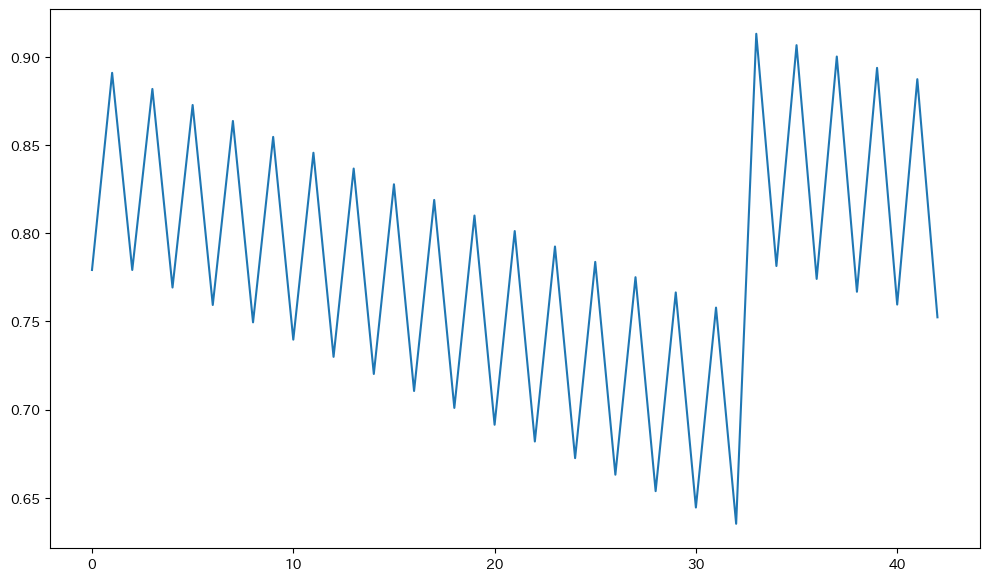

In [16]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(lis)

In [ ]:

print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  

In [ ]:

print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  


IYR
start:2011.1 ～ Losscut(%) 13 Profitline(%) 3 sharpratio : 2.026364372980049

RWR
start:2011.1 ～ Losscut(%) 13 Profitline(%) 3 sharpratio : 2.1506774319924284

XLRE¶
start:2015.10 ～ Losscut(%) 10 Profitline(%) 3 sharpratio : 2.1491427254600883

VNQ REIT指数でなく、不動産指標で、性質が少し異なる
start:2011.1 ～ Losscut(%) 12 Profitline(%) 3 sharpratio : 1.9552072952592134

SCHH REIT指数ではあるが、上記３つと性質が少し異なる
start:2011.1 ～ Losscut(%) 11 Profitline(%) 3 sharpratio : 2.097557524833007

(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 3 profit_count: 27
totalreturn: [120.51965266] initiate

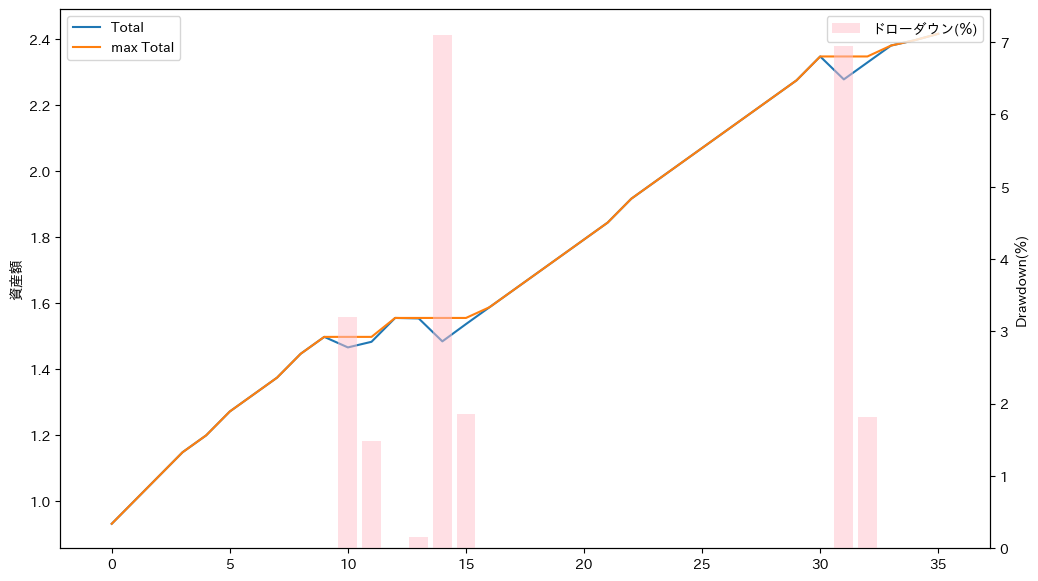

In [85]:
data =  price_and_predict["2014-08-01":"2023-06-01"]


temp = calc(data, last_losscut, last_profitlevel, False, 1, sell_last_losscut, sell_last_profitlevel, data2)  # 第４因数は、Falseの方がデフォです。
totalreturns, df = temp[0], temp[1]
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
print(f"sharp ratio : {sharp_ratio*np.sqrt(4)}")
graph(df, False, "./graph_image/"+ticker+"graph_6month3", True)

In [ ]:
df.to_csv('data/10start.csv')

In [ ]:
1=2 # Run all でここまで実行する。

In [ ]:
df

In [ ]:
df.to_csv('testdata/'+ticker+'dataframe.csv')

In [ ]:
start = 2015 # year

dic = {f"{start+i}.12":[j] for i,j in enumerate(totalreturns) }
df2 = df.set_index([df.index.year, df.index])
df2.index.names = ['year', 'date']
for i in range(12):
    df2.query('year==2011').sum()['interest']
dic2 = {f"{2015+i}.{12}":[f"{df2.query('year==@start+@i').sum()['Return']:.2f}"] for i in range(8) }

temp = pd.DataFrame(dic).rename({0:"累積資産額"})
temp2 = pd.DataFrame(dic2).rename({0:"yield"})
temp3 = pd.concat([temp,temp2])

temp3.T.to_csv('./tabledata/'+ticker+'table_3month.csv')
pd.set_option('display.max_row', None)
temp3.T

In [ ]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal==0'))

C:\Users\admin\AppData\Local\Temp\ipykernel_9868\2345961192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(df))]


(入力前の)シグナルが0なら売ります。
loss_cut: 0 profit_count: 0
totalreturn: [20.14999771] initiate_asset:74.05000305175781
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 7.100 %


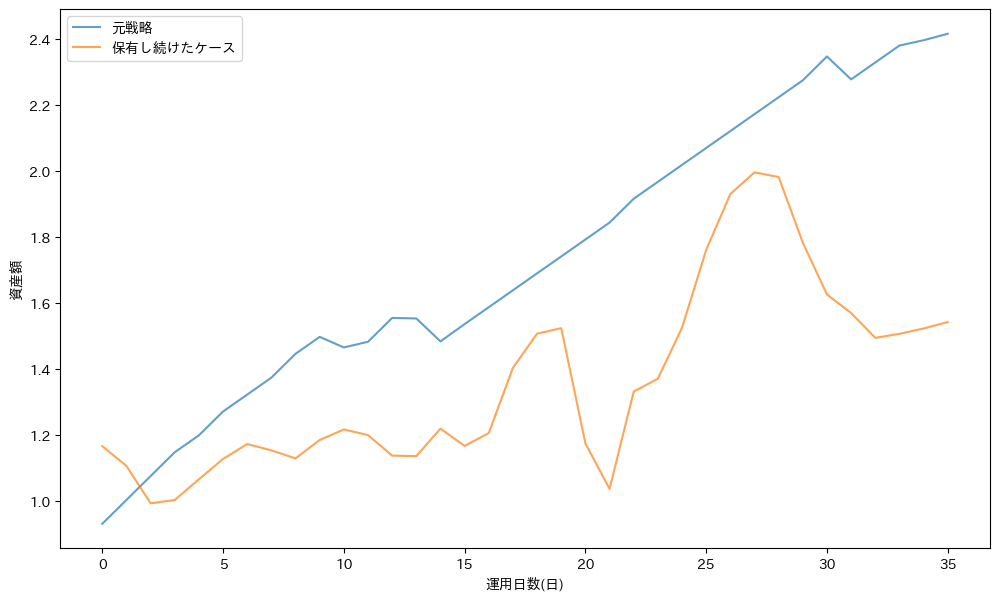

In [86]:

data['predict']= [1 for i in range(len(df))]
c, df3 = calc(data, 1, 1, False,1,1, data2)
def graph3(df, save, file_name, raw_data=df3, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp, temp2 = df["interest"].values, raw_data["interest"].values

        initial = df["open_price"][0] 
        lis = np.cumsum(temp) + initial
        lis2 = np.cumsum(temp2) + initial
        
        
        profit_month =np.array(lis)  / initial
        profit_month2 =np.array(lis2)  / initial

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        total2 = profit_month2

        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp, temp2 = df["Return"].values, raw_data["Return"].values

        

        profit_daily = temp
        profit_daily2 = temp2


        # 単利運用での資産額の計算(初日を1とする)
        total = 1 + np.cumsum(profit_daily) 
        total2 = 1 + np.cumsum(profit_daily2)

        
        # 日ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values 

        # ドローダウンの計算
        dd = max_assets - total # 単利運用なので初期資金(1)に対する額で計算
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.set_xlabel('運用日数(日)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='保有し続けたケース', alpha=0.7)

    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")

graph3(df, True, './graph_image/USReit_3mo2', df3, True)